In [2]:
import pandas as pd
from collections import defaultdict
import re
import numpy as np
import sys

sys.path.insert(0, 'base_codes')
sys.path.insert(0, 'data_specific_codes')
sys.path.insert(0, 'utility_codes')

#%run -i 'parameters'
#%run -i 'main_functions'
#%run -i 'utility_functions'

from RE_init import *
from main_functions import *
from utility_functions import *

In [3]:
%load_ext autoreload
%autoreload 2

A problem I had with Tolkien's work I'd that neither Bilbo nor the dwarves kill the dragon.


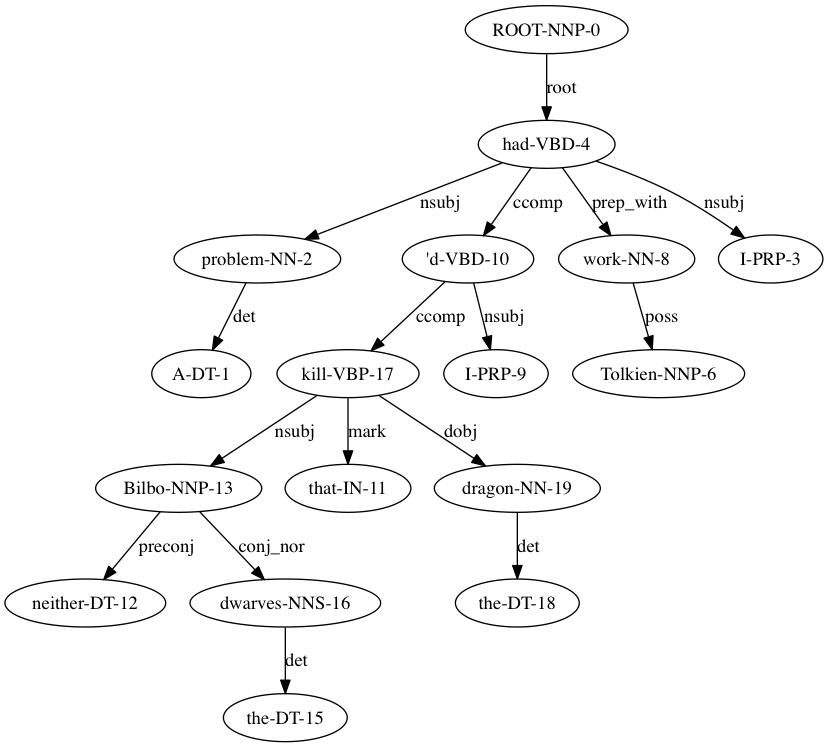

Simplifided Version:
>Extraction Number:  1  -  Pattern:  SVO  - relation : ( {bilbo} ,  {kill} ,  the {dragon} )
----- Extra: arg1_prep:    rel_prep:    arg2_prep:   


More detailed Version:
>Extraction Number:  1  -  Pattern:  SVO  - relation : ( {Bilbo} ,  {kill} ,  the {dragon} )
----- Extra: arg1_prep:    rel_prep:    arg2_prep:   




In [4]:



from nltk.tokenize import sent_tokenize
from practnlptools.tools import Annotator
annotator = Annotator()
#t_orig = "Bilbo fights goblins and saves dwarves from spiders" 
#t_orig = "Bilbo fights goblins and kill spiders in mountain" 
#t_orig = "The elves's servants roll these barrels down the river and Bilbo follows The elves."
#t_orig = "One day while wandering in cave, Bilbo Baggins finds the golden ring"
#t_orig = "Bilbo, saves dwarves from the spiders."
#t_orig = "Bilbo saves dwarves from the spider, and kill the Smaug dragon in mountain."
#t_orig = "The dwarves wants to reclaiming the Lonely Mountain and the Lonely Mountain's vast treasure from the dragon Smaug and thus begins the most unexpected journey of Bilbo Baggins which will eventually change the history of middle earth."
#t_orig = "Bilbo steals the ring, and then run away."
t_orig = "A problem I had with Tolkien's work I'd that neither Bilbo nor the dwarves kill the dragon."

#t_orig = t_orig.replace("-",".")
t_orig = t_orig.replace("(","")
t_orig = t_orig.replace(")","")
#t_orig = change_nt_to_not(t_orig)
t_orig = clean_sent(t_orig)
t_sentences = sent_tokenize(t_orig)
for t in t_sentences:
    print t
    t_annotated = annotator.getAnnotations(t, dep_parse=True)
    #print t_annotated
    dep = t_annotated['dep_parse']
    g_dir = create_dep_graph(t_annotated)
    if g_dir is None:
        print "No extraction found"
        continue
    #if SHOW_DP_PLOTS:
    plot_dep(g_dir,t)
    g_undir = g_dir.to_undirected()
    rels_pure, rels_simp = get_relations(g_dir, t_annotated,EXTRACT_NESTED_PREPOSITIONS_RELS=True, option="SVO")
    #rels_pure, rels_simp = get_relations_n_aray(g_dir, t_annotated, option="SVO")
    #print rels_pure
    #print "simplified"
    #print rels_simp
    print "Simplifided Version:"
    print_relations(rels_simp)
    print "More detailed Version:"
    print_relations(rels_pure)  